In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

In [46]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
df = pd.read_csv(os.path.join(dirname, filename))
df

/kaggle/input/weather-type-classification/weather_classification_data.csv


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


# EDA

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [48]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [49]:
df.drop(['Cloud Cover', 'Season', 'Location', 'Weather Type'], axis = 1).corr()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
Temperature,1.000000,-0.207969,-0.070022,-0.287206,0.209188,0.374773,0.250751
Humidity,-0.207969,1.000000,0.406079,0.638631,-0.120653,-0.342694,-0.479969
Wind Speed,-0.070022,0.406079,1.000000,0.443770,-0.077757,-0.068147,-0.311828
Precipitation (%),-0.287206,0.638631,0.443770,1.000000,-0.177444,-0.291601,-0.457444
Atmospheric Pressure,0.209188,-0.120653,-0.077757,-0.177444,1.000000,0.154128,0.120182
UV Index,0.374773,-0.342694,-0.068147,-0.291601,0.154128,1.000000,0.362922
Visibility (km),0.250751,-0.479969,-0.311828,-0.457444,0.120182,0.362922,1.000000


(array([0.00528601, 0.00497957, 0.00536261, 0.00543922, 0.00704801,
        0.00513279, 0.00513279, 0.00451992, 0.00421348, 0.00482635,
        0.00482635, 0.00536261, 0.00467314, 0.00605209, 0.00543922,
        0.00536261, 0.00674157, 0.00589888, 0.00605209, 0.00605209,
        0.00559244, 0.00528601, 0.0052094 , 0.00528601, 0.00551583,
        0.00459653, 0.00605209, 0.00490296, 0.00674157, 0.00750766,
        0.01118488, 0.01264045, 0.0104954 , 0.01241062, 0.01118488,
        0.01080184, 0.01225741, 0.01126149, 0.01080184, 0.01248723,
        0.02367211, 0.0209142 , 0.01991828, 0.02229316, 0.01899898,
        0.02122063, 0.02106742, 0.02259959, 0.02160368, 0.02175689,
        0.02206333, 0.02083759, 0.02068437, 0.02160368, 0.02068437,
        0.01869254, 0.02397855, 0.02099081, 0.02114402, 0.01968846,
        0.01172114, 0.01432584, 0.01317671, 0.01302349, 0.01264045,
        0.01409602, 0.01432584, 0.01386619, 0.01378958, 0.01447906,
        0.01195097, 0.01524515, 0.01348315, 0.01

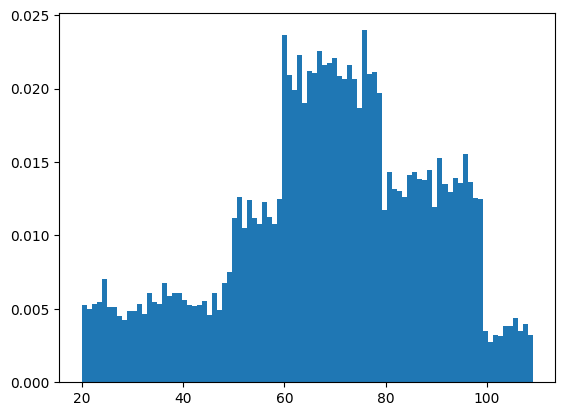

In [50]:
plt.hist(df['Humidity'], bins = df['Humidity'].nunique(), density = True)

# Analysing the ouliers

## Humidity values above 100%

In [51]:
round((len(df[df['Humidity'] > 100]) / len(df)) * 100, 2)

3.15

In [52]:
df[df['Humidity'] > 100]['Weather Type'].value_counts()

Weather Type
Cloudy    111
Sunny     104
Snowy     102
Rainy      99
Name: count, dtype: int64

In [53]:
df['Weather Type'].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

In [54]:
def calcula_diferenca_de_umidade(df, tipo):
    media_normal = df[ (df['Weather Type'] == tipo) & (df['Humidity'] <= 100) ] ['Humidity'].mean()
    media_total = df[df['Weather Type'] == tipo]['Humidity'].mean()
    
    variacao = 1 - (media_normal / media_total)
                     
    print(f"Para o tipo '{tipo}', a média total é {round(media_total, 2)} e a média sem os outliers é {round(media_normal, 2)}.\nA variação é de {round(variacao * 100, 2)}%")
    
print("Antes da limpeza:\n\n")
for tipo in df['Weather Type'].unique():
    calcula_diferenca_de_umidade(df, tipo)

Antes da limpeza:


Para o tipo 'Rainy', a média total é 78.4 e a média sem os outliers é 77.57.
A variação é de 1.05%
Para o tipo 'Cloudy', a média total é 66.53 e a média sem os outliers é 65.17.
A variação é de 2.04%
Para o tipo 'Sunny', a média total é 51.41 e a média sem os outliers é 49.66.
A variação é de 3.39%
Para o tipo 'Snowy', a média total é 78.51 e a média sem os outliers é 77.66.
A variação é de 1.08%


In [55]:
for tipo in df['Weather Type'].unique():    
    media = df[ (df['Weather Type'] == tipo) & (df['Humidity'] <= 100) ] ['Humidity'].mean()
    mask = ((df['Weather Type'] == tipo) & (df['Humidity'] > 100))
    df.loc[mask, 'Humidity'] = media
    
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73.0,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96.0,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64.0,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83.0,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74.0,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74.0,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76.0,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77.0,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76.0,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [56]:
print("Depois da limpeza:\n\n")
for tipo in df['Weather Type'].unique():
    calcula_diferenca_de_umidade(df, tipo)

Depois da limpeza:


Para o tipo 'Rainy', a média total é 77.57 e a média sem os outliers é 77.57.
A variação é de 0.0%
Para o tipo 'Cloudy', a média total é 65.17 e a média sem os outliers é 65.17.
A variação é de 0.0%
Para o tipo 'Sunny', a média total é 49.66 e a média sem os outliers é 49.66.
A variação é de 0.0%
Para o tipo 'Snowy', a média total é 77.66 e a média sem os outliers é 77.66.
A variação é de 0.0%
